In [ ]:
!pip install lime

In [ ]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import lime.lime_tabular
from skimage.segmentation import mark_boundaries
import shap
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import PartialDependenceDisplay

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/creditcard.csv', on_bad_lines='skip')

In [ ]:
print(df.isnull().sum())


Time        0
V1          0
V2          0
V3          1
V4          1
V5          3
V6          3
V7          5
V8          8
V9          9
V10        12
V11        13
V12        16
V13        21
V14        26
V15        31
V16        35
V17        38
V18        41
V19        47
V20        55
V21        60
V22        65
V23        78
V24        88
V25        96
V26       102
V27       116
V28       125
Amount    131
Class     137
dtype: int64


In [ ]:
df.duplicated().sum()

np.int64(210207)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

V4             V9           V10           V14  \
count  353298.000000  353290.000000  3.532870e+05  3.532730e+05   
mean       -0.000512      -0.010490  3.680097e+00  3.669022e+00   
std         1.408098       1.091485  2.183902e+03  2.183236e+03   
min        -5.683171     -13.434066 -2.458826e+01 -1.921433e+01   
25%        -0.846565      -0.648568 -5.308445e-01 -4.284604e-01   
50%        -0.019231      -0.058758 -9.193861e-02  4.596749e-02   
75%         0.745263       0.583181  4.551586e-01  4.836477e-01   
max        16.875344      29.810000  1.298065e+06  1.297645e+06   

                 V16            V17            V18            V21  \
count  353264.000000  353261.000000  353258.000000  353239.000000   
mean        0.004669       0.014671       0.003948       0.003174   
std         0.967039       6.463339       2.880128       1.517087   
min       -14.129855     -25.162799      -9.498746     -34.830382   
25%        -0.463982      -0.482409      -0.500339      -0.228477   
50%         0.070214      -0.064056      -0.008004      -0.029965   
75%         0.525487       0.400617       0.497970       0.183933   
max       233.600000    3790.390000    1599.020000     583.200000   

                V22           V23            V24            V26  \
count  3.532340e+05  3.532210e+05  353211.000000  353197.000000   
mean  -1.226791e+05 -1.400695e+02       0.001519       0.032301   
std    7.291246e+07  8.325194e+04       0.666534      16.881973   
min   -4.333442e+10 -4.947862e+07      -2.836627      -2.604551   
25%   -5.455217e-01 -1.620661e-01      -0.353704      -0.323945   
50%    4.285495e-03 -1.176045e-02       0.041752      -0.049808   
75%    5.245588e-01  1.466797e-01       0.438874       0.240178   
max    4.949900e+02  2.000000e+03     151.710000   10026.000000   

                 V27            V28         Amount          Class  
count  353183.000000  353174.000000  353168.000000  353162.000000  
mean        0.004615       0.001310      88.331915       0.001639  
std         1.138528       0.431263     249.542102       0.040457  
min       -22.565679     -15.430084       0.000000       0.000000  
25%        -0.070545      -0.052350       5.670000       0.000000  
50%         0.001684       0.011965      22.040000       0.000000  
75%         0.091294       0.078653      77.490000       0.000000  
max       583.200000     151.710000   25691.160000       1.000000

In [ ]:
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)


y = y.fillna(y.mode()[0])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

X_res_df = pd.DataFrame(X_res, columns=X.columns)
y_res_df = pd.DataFrame(y_res, columns=["Class"])

balanced_df = pd.concat([X_res_df, y_res_df], axis=1)
balanced_df.to_csv("balanced_creditcard.csv", index=False)
print("Saved balanced dataset to balanced_creditcard.csv")

Saved balanced dataset to balanced_creditcard.csv


**EDA**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

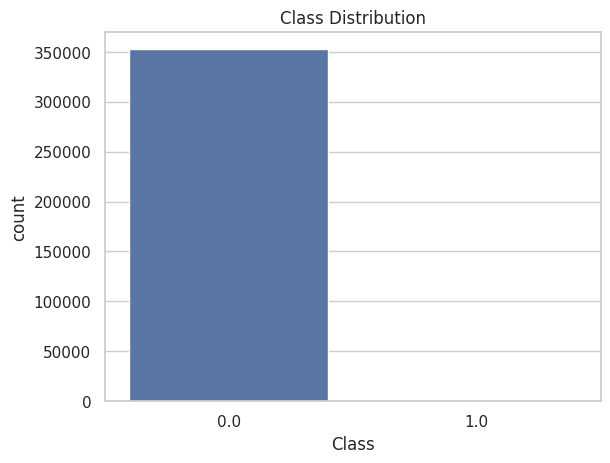

In [ ]:
sns.countplot(data=df, x='Class')
plt.title('Class Distribution')
plt.show()

In [ ]:
import seaborn as sns

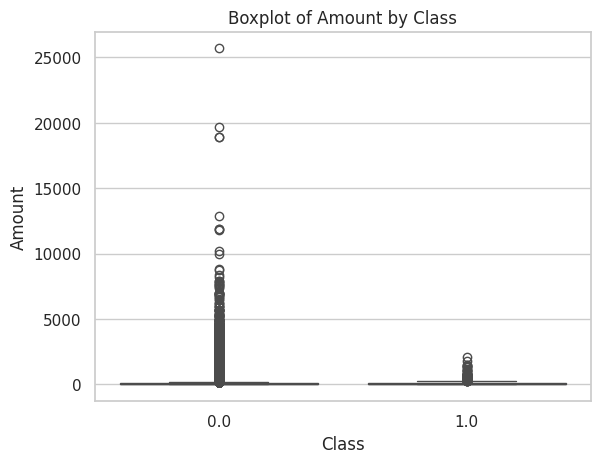

In [ ]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot of Amount by Class')
plt.show()

**KDE Plot of selected features**

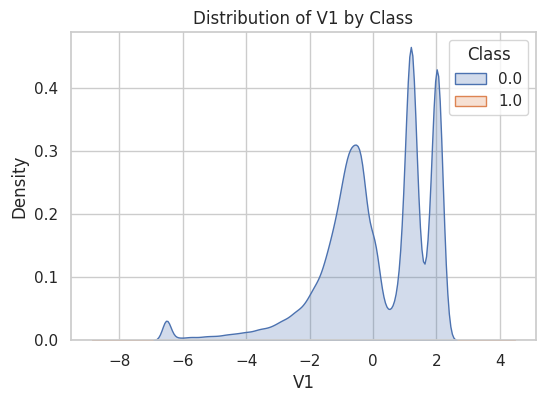

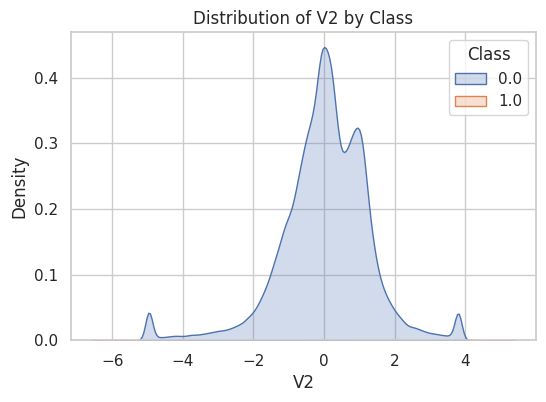

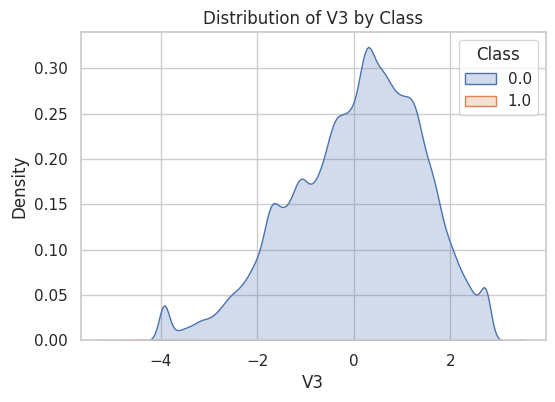

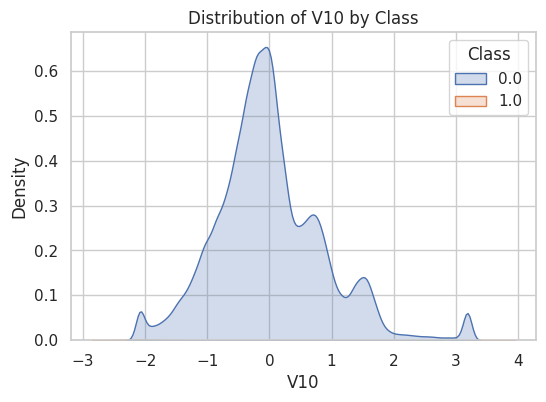

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

features = ['V1', 'V2', 'V3', 'V10']
for col in features:
    plt.figure(figsize=(6, 4))
    numeric_col = pd.to_numeric(df[col], errors='coerce')
    data_clipped = numeric_col.clip(lower=numeric_col.quantile(0.01),
                                     upper=numeric_col.quantile(0.99))
    plot_df = pd.DataFrame({col: data_clipped, 'Class': df['Class']})
    sns.kdeplot(data=plot_df, x=col, hue='Class', fill=True)
    plt.title(f'Distribution of {col} by Class')
    plt.show()

Univariate  Analysis

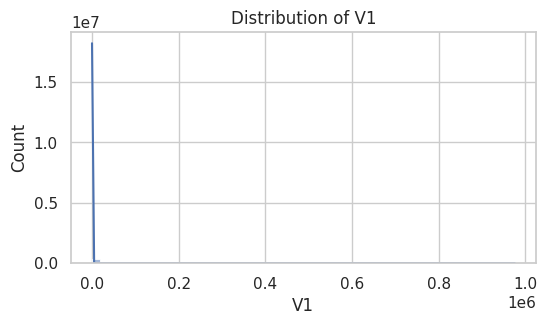

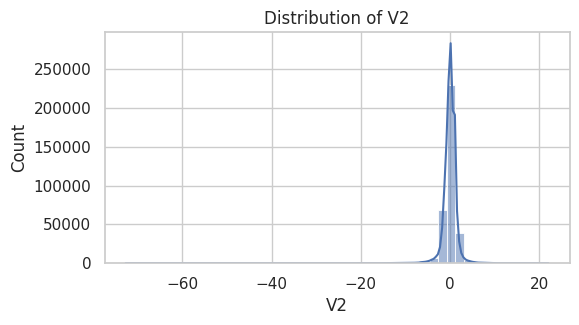

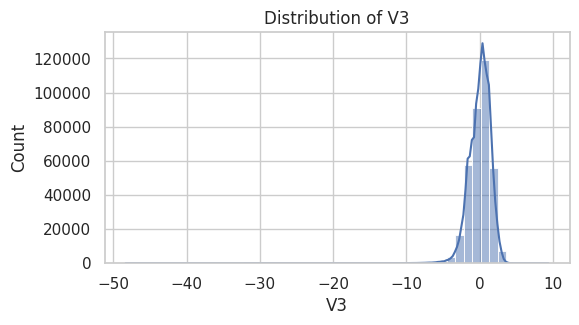

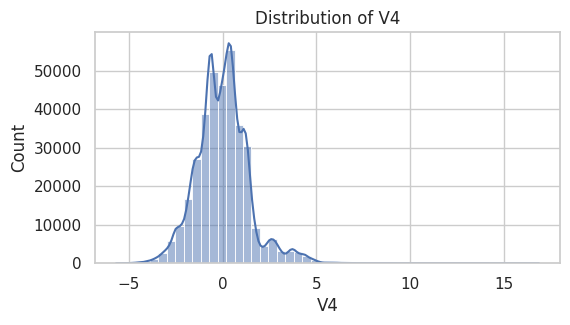

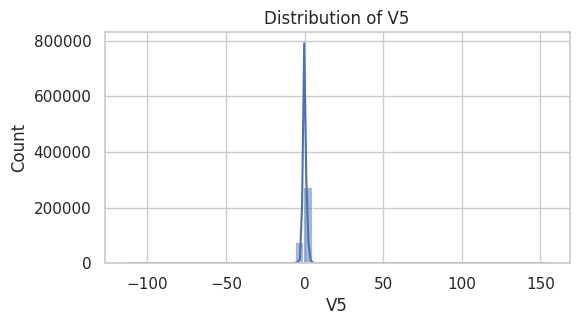

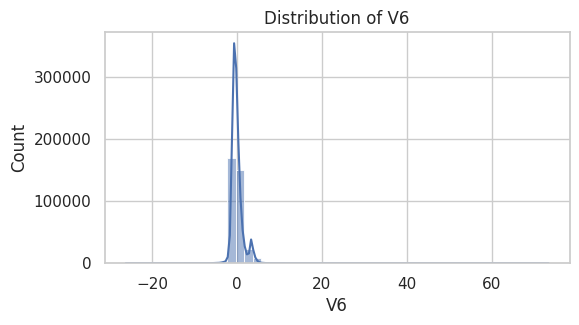

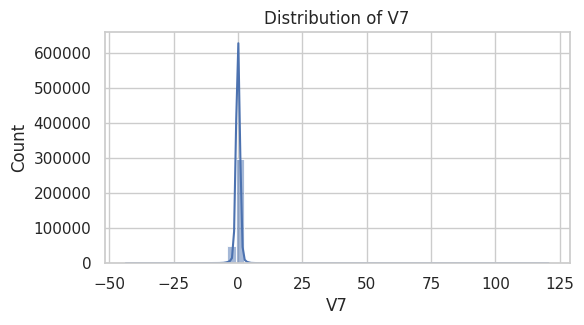

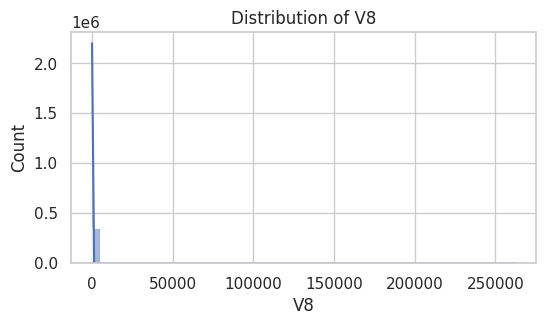

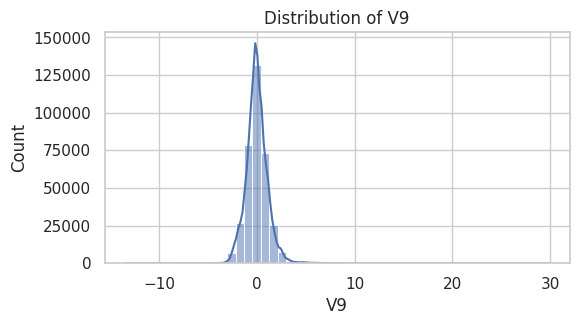

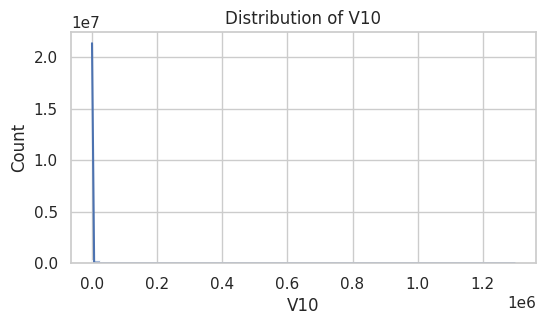

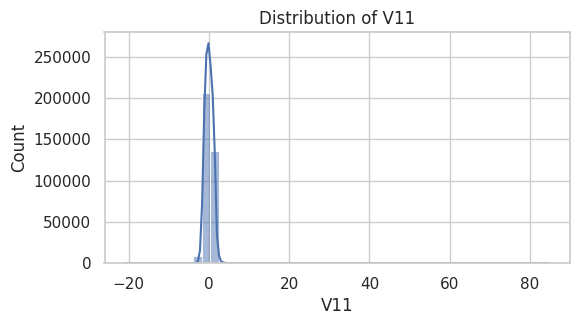

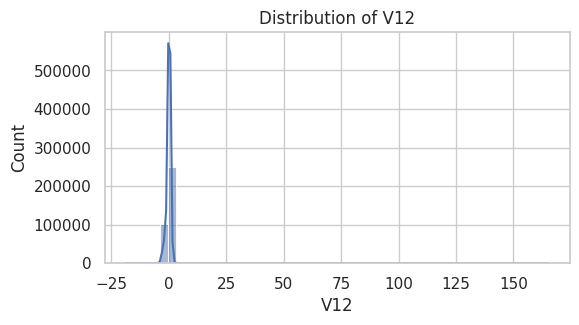

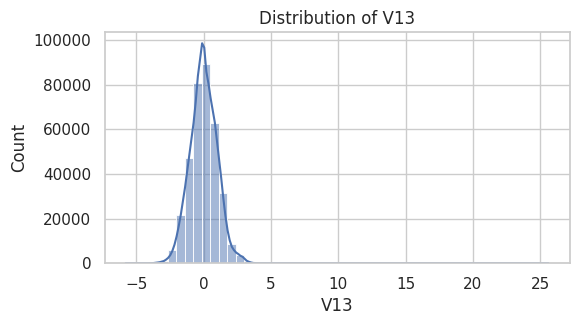

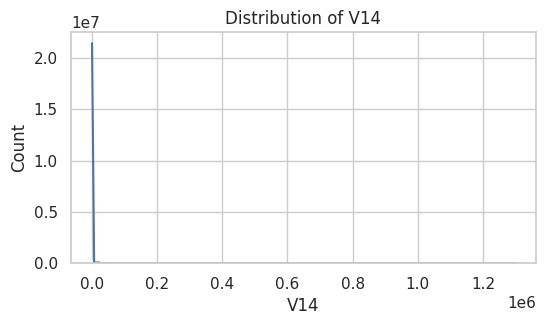

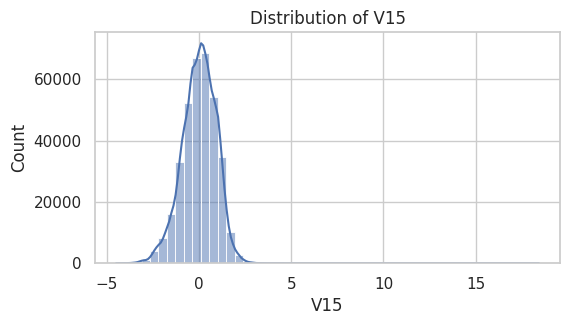

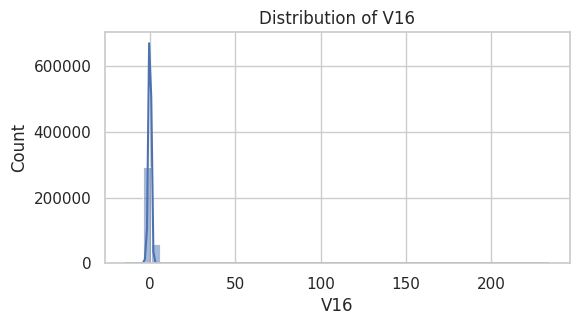

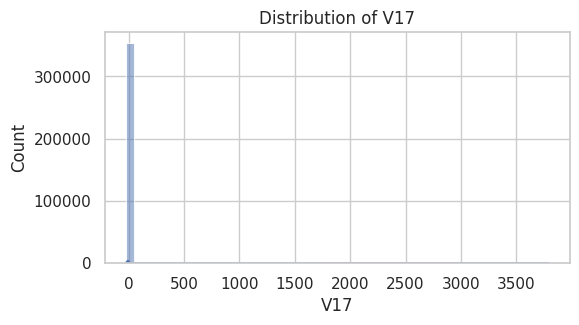

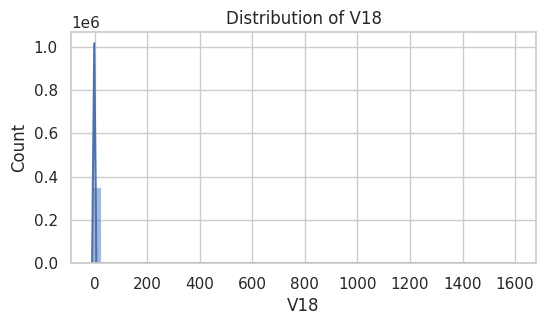

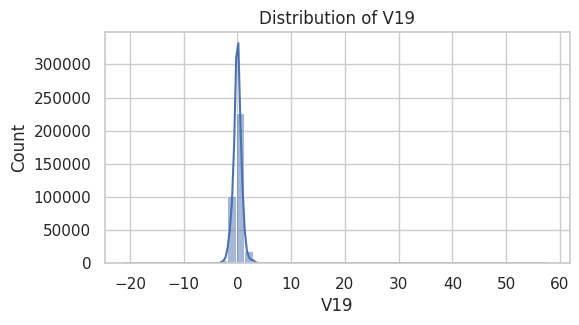

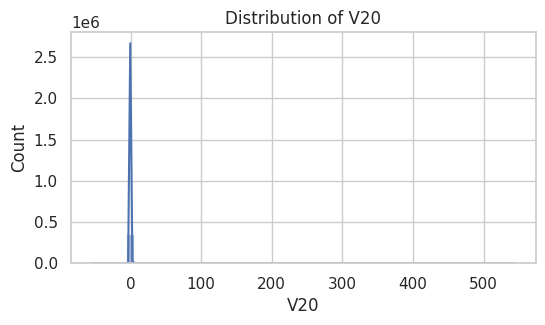

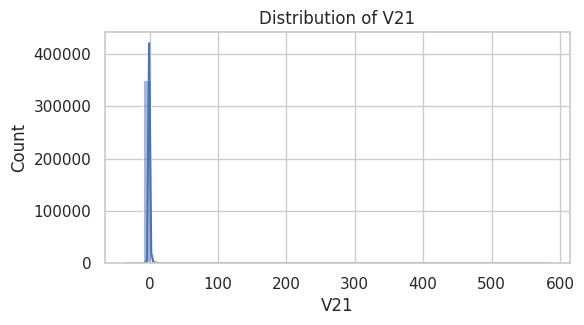

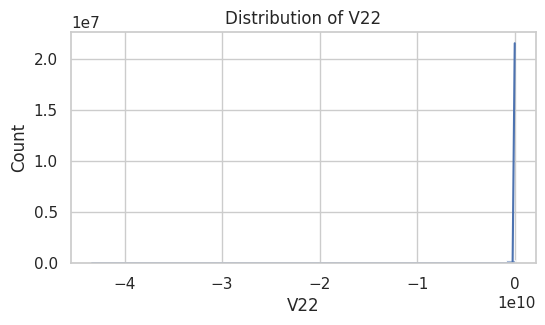

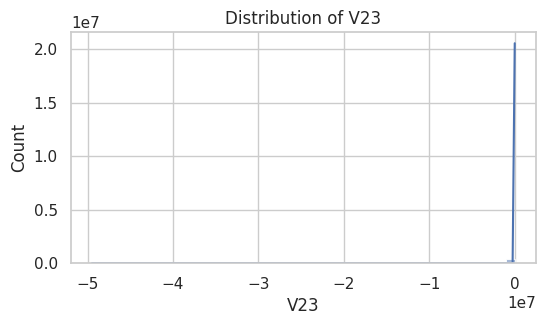

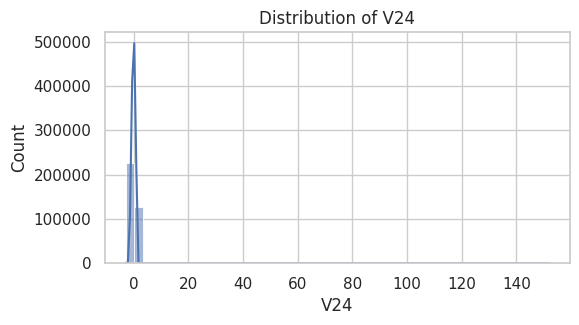

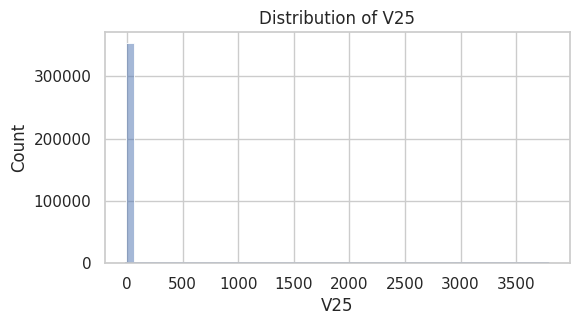

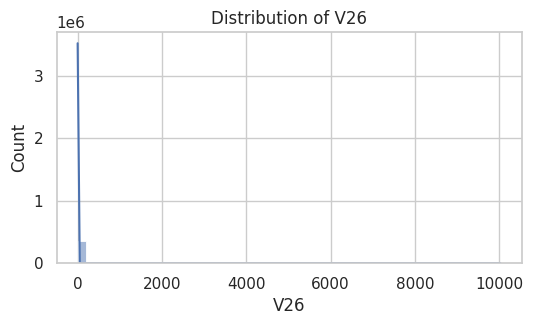

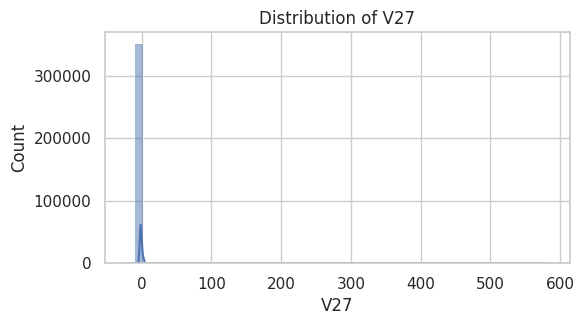

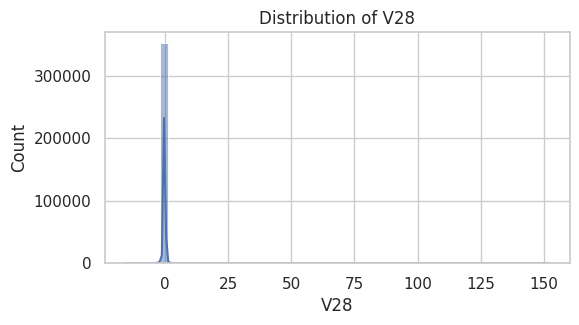

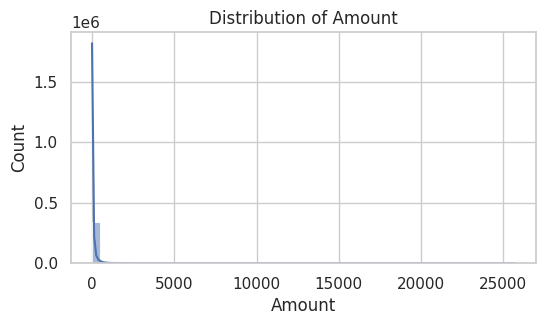

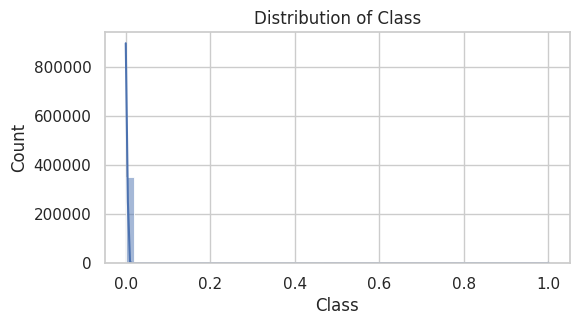

In [ ]:
num_cols = balanced_df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(6, 3))
    numeric_col = pd.to_numeric(df[col], errors='coerce')
    sns.histplot(numeric_col.dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
print("Skewness and Kurtosis:")
for col in num_cols:
    print(f"{col}: Skew={skew(balanced_df[col]):.2f}, Kurtosis={kurtosis(balanced_df[col]):.2f}")

Skewness and Kurtosis:
V1: Skew=700.89, Kurtosis=516581.77
V2: Skew=1.57, Kurtosis=7.55
V3: Skew=-2.27, Kurtosis=5.38
V4: Skew=0.93, Kurtosis=0.36
V5: Skew=-2.39, Kurtosis=10.62
V6: Skew=0.32, Kurtosis=9.03
V7: Skew=-2.62, Kurtosis=9.24
V8: Skew=839.71, Kurtosis=705222.98
V9: Skew=-1.29, Kurtosis=2.66
V10: Skew=839.89, Kurtosis=705420.67
V11: Skew=1.09, Kurtosis=2.06
V12: Skew=-1.37, Kurtosis=4.54
V13: Skew=0.11, Kurtosis=0.59
V14: Skew=839.89, Kurtosis=705422.79
V15: Skew=-0.44, Kurtosis=0.63
V16: Skew=-1.01, Kurtosis=31.50
V17: Skew=184.26, Kurtosis=93757.90
V18: Skew=197.96, Kurtosis=102008.90
V19: Skew=0.54, Kurtosis=7.53
V20: Skew=138.91, Kurtosis=61628.74
V21: Skew=50.71, Kurtosis=13349.85
V22: Skew=-839.90, Kurtosis=705435.00
V23: Skew=-839.90, Kurtosis=705435.00
V24: Skew=24.92, Kurtosis=6293.24
V25: Skew=802.79, Kurtosis=663634.15
V26: Skew=837.42, Kurtosis=702651.95
V27: Skew=187.93, Kurtosis=90851.76
V28: Skew=56.66, Kurtosis=17326.48
Amount: Skew=11.59, Kurtosis=526.25
Clas

Bivariate Analysis


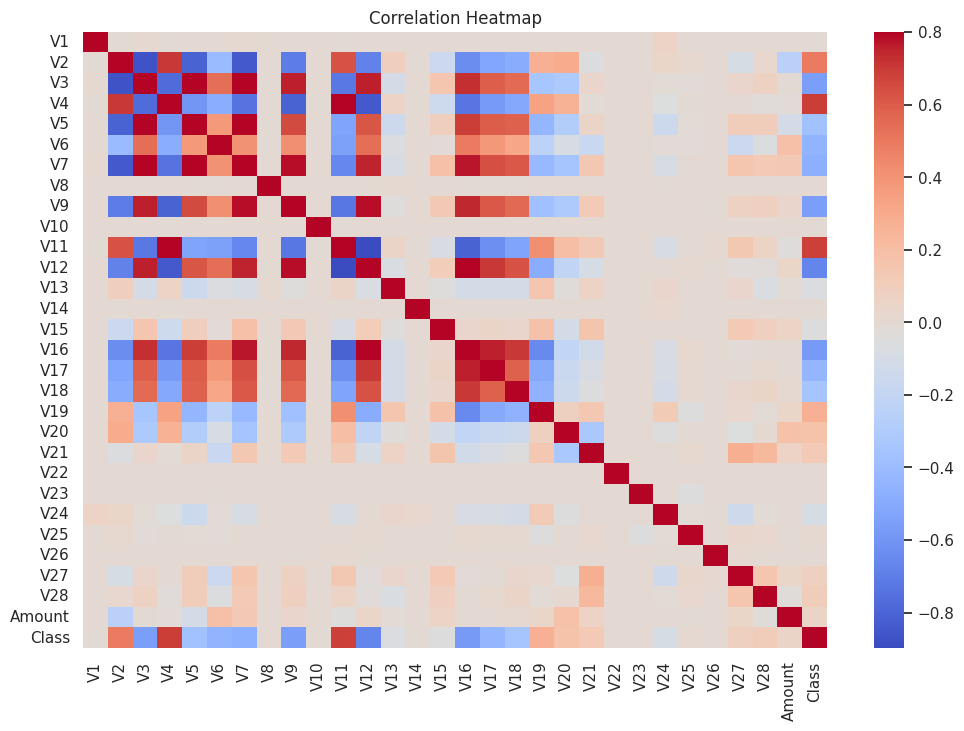

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(balanced_df.corr(), cmap='coolwarm', vmax=0.8)
plt.title('Correlation Heatmap')
plt.show()

Multivariate analysis (pairplot)

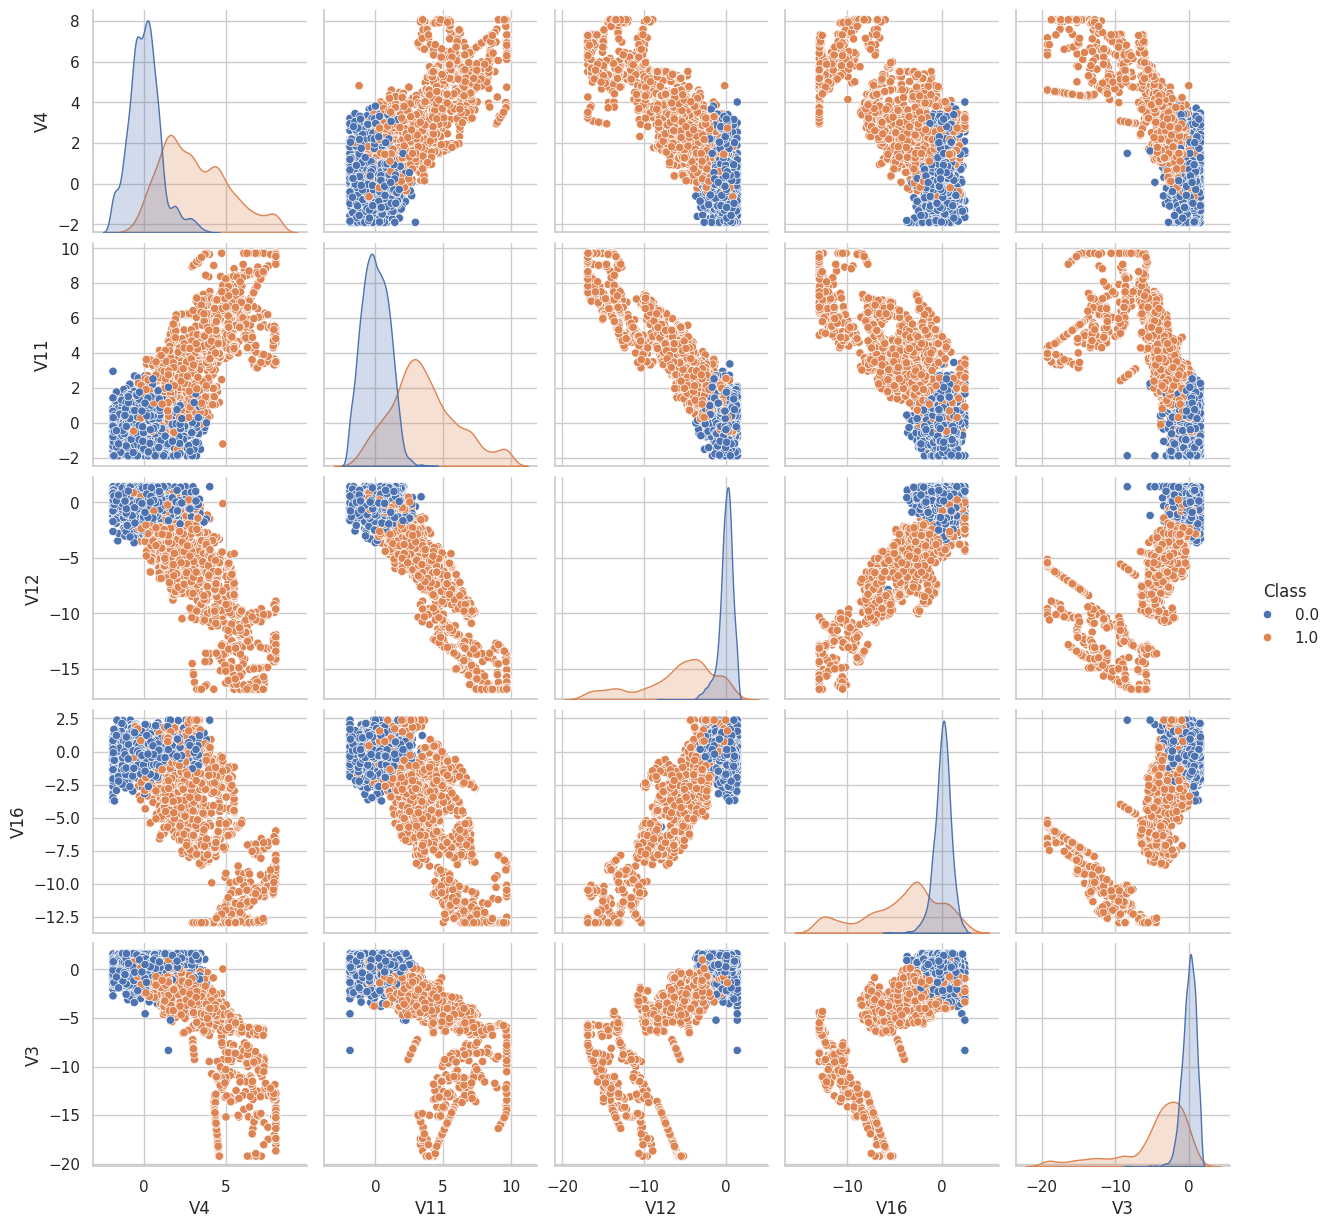

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sampled_df = balanced_df.sample(n=5000, random_state=1)
for col in corrs:
    sampled_df[col] = sampled_df[col].clip(
        lower=sampled_df[col].quantile(0.01),
        upper=sampled_df[col].quantile(0.99)
    )

sns.pairplot(sampled_df, vars=corrs.tolist(), hue='Class')
plt.show()

Feature engineering

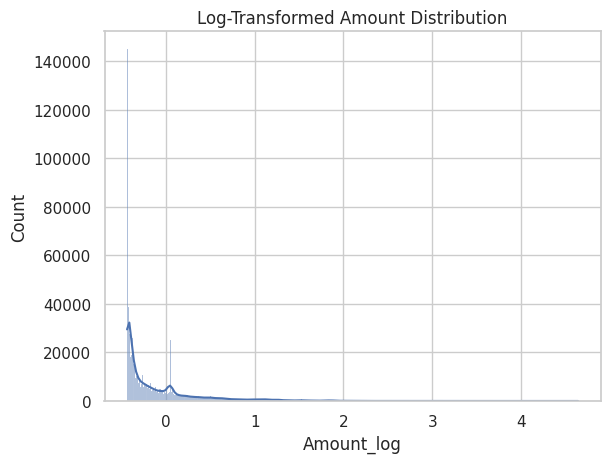

In [ ]:
balanced_df['Amount_log'] = np.log1p(balanced_df['Amount'])
sns.histplot(balanced_df['Amount_log'], kde=True)
plt.title("Log-Transformed Amount Distribution")
plt.show()

K-Nearst Neighbours

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# float32 to reduce memory
X_res = X_res.astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', n_jobs=-1)
knn_model.fit(X_train, y_train)

KNN_Y_Pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, KNN_Y_Pred)
print("Accuracy:", accuracy)



Accuracy: 0.999355012474484


PDP

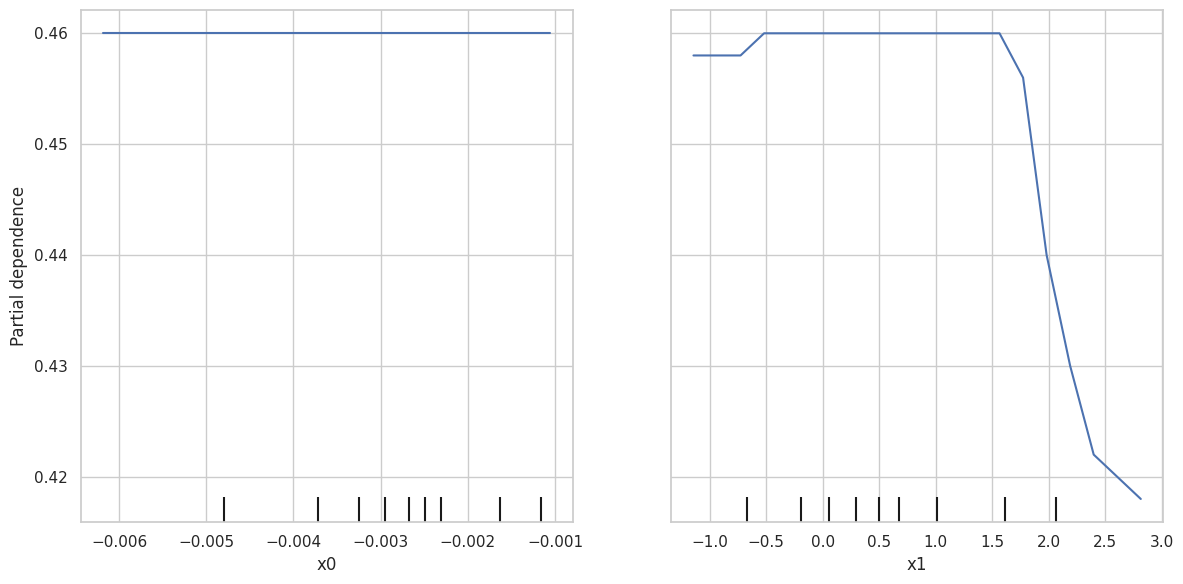

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

subset = X_test[:100]
features = [0, 1]

fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(
    knn_model,
    subset,
    features=features,
    grid_resolution=20,
    ax=ax
)
plt.tight_layout()
plt.show()


ICE

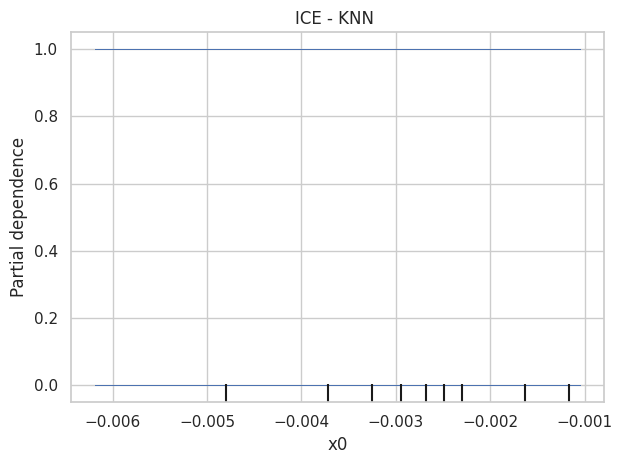

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

feature = [0]
subset = X_test[:100]


PartialDependenceDisplay.from_estimator(knn_model,subset,features=feature,kind='individual')
plt.title("ICE - KNN ")
plt.tight_layout()
plt.show()


LIME

In [ ]:
def predict_proba(data):
    return knn_model.predict_proba(data)


In [ ]:
feature_names = X.columns

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=feature_names,
    class_names=['Not Fraud', 'Fraud'],
    mode='classification'
)

i = 10
exp = explainer.explain_instance(
    data_row=X_test[i],
    predict_fn=predict_proba,
    labels=(1,),
    num_features=5
)
exp.show_in_notebook(show_table=True, show_all=False)


**Permutation Feature Importance**

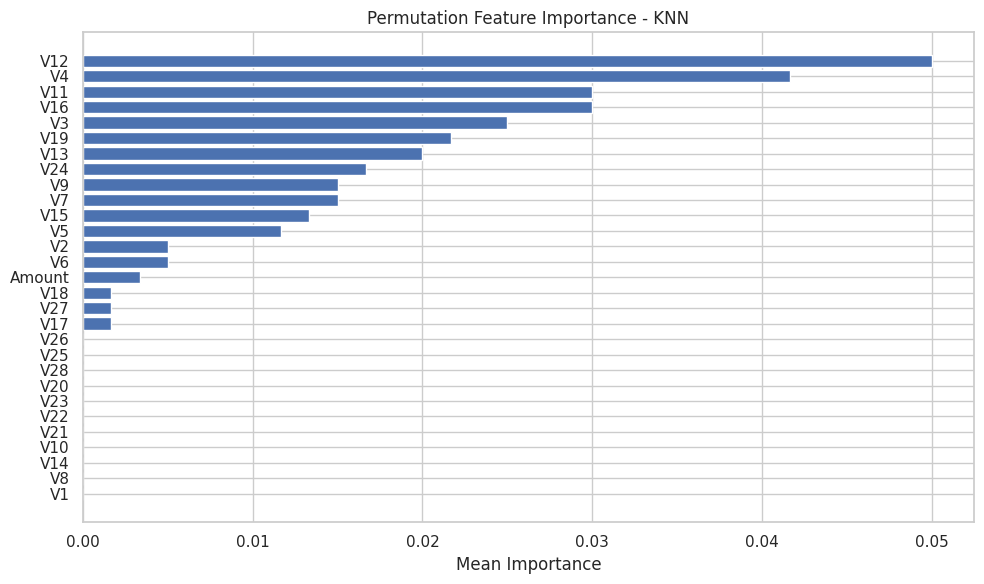

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

X_test_subset = X_test[:200]
y_test_subset = y_test[:200]


result = permutation_importance(
    knn_model,
    X_test_subset,
    y_test_subset,
    n_repeats=3,
    random_state=42,
    n_jobs=-1
)


sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.title("Permutation Feature Importance - KNN")
plt.xlabel("Mean Importance")
plt.tight_layout()
plt.show()


LOFO